In [2]:
!pip install gym

In [15]:
import random
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout, Activation
from keras.models import Sequential
from keras.optimizers import Adam
from keras import backend as K
from collections import deque
import gym

#选取互动环境
env = gym.make('CartPole-v1')
state = env.reset()

/usr/local/lib/python3.6/dist-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


In [16]:
#0或1表示让小车向不同方向移动
action = 0
#step(action)表示想环境发生命令
new_state, reward, done , info = env.step(action)
print((new_state, reward, done, info))

(array([-0.03110931, -0.23055778, -0.00225125,  0.24765558]), 1.0, False, {})


In [0]:
import random
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout, Activation
from keras.models import Sequential
from keras.optimizers import Adam
from keras import backend as K
from collections import deque
import gym
#选取互动环境
env = gym.make('FrozenLake-v0')
state = env.reset()
env.render()

Using TensorFlow backend.



SFFF
FHFH
FFFH
HFFG


/usr/local/lib/python3.6/dist-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


In [0]:
def  random_actions_game(episodes):
  for episode in range(episodes):
    state = env.reset()
    score = 0
    done = False
    while not done:
      #随机向环境发生命令
      action = random.choice([0, 1])
      new_state, reward, done, info = env.step(action)
      score += 1
    print('Episode: {} score: {}'.format(episode + 1, score))


    random_actions_game(10)

Episode: 1 score: 16
Episode: 2 score: 34
Episode: 3 score: 17
Episode: 4 score: 16
Episode: 5 score: 11
Episode: 6 score: 29
Episode: 7 score: 9
Episode: 8 score: 24
Episode: 9 score: 14
Episode: 10 score: 20


In [0]:
env = env.unwrapped
#环境状态点数量
print(env.observation_space.n)
#可采取的行动数量
print(env.action_space.n)
#在每个节点采取四种行动的概率
print(env.P)

16
4
{0: {0: [(0.3333333333333333, 0, 0.0, False), (0.3333333333333333, 0, 0.0, False), (0.3333333333333333, 4, 0.0, False)], 1: [(0.3333333333333333, 0, 0.0, False), (0.3333333333333333, 4, 0.0, False), (0.3333333333333333, 1, 0.0, False)], 2: [(0.3333333333333333, 4, 0.0, False), (0.3333333333333333, 1, 0.0, False), (0.3333333333333333, 0, 0.0, False)], 3: [(0.3333333333333333, 1, 0.0, False), (0.3333333333333333, 0, 0.0, False), (0.3333333333333333, 0, 0.0, False)]}, 1: {0: [(0.3333333333333333, 1, 0.0, False), (0.3333333333333333, 0, 0.0, False), (0.3333333333333333, 5, 0.0, True)], 1: [(0.3333333333333333, 0, 0.0, False), (0.3333333333333333, 5, 0.0, True), (0.3333333333333333, 2, 0.0, False)], 2: [(0.3333333333333333, 5, 0.0, True), (0.3333333333333333, 2, 0.0, False), (0.3333333333333333, 1, 0.0, False)], 3: [(0.3333333333333333, 2, 0.0, False), (0.3333333333333333, 1, 0.0, False), (0.3333333333333333, 0, 0.0, False)]}, 2: {0: [(0.3333333333333333, 2, 0.0, False), (0.33333333333

In [0]:
print(env.P[14][1])

[(0.3333333333333333, 13, 0.0, False), (0.3333333333333333, 14, 0.0, False), (0.3333333333333333, 15, 1.0, True)]


In [0]:
#初始化所有状态点为0
value_of_table = np.zeros(env.observation_space.n)
#设置循环更新最大次数
no_of_iteration = 100000

In [0]:
def  value_iteration(env, gamma = 1.0):
  #设定阈值
  threshold = 1e-20
  
  for i in range(no_of_iteration):
    updated_value_of_table = np.copy(value_of_table)
    #根据公式（8）循环更新每个节点值
    for state in range(env.observation_space.n):
      Q_value = []
      #计算在给的状态点采取所有行动后可获得的最大值
      for action in range(env.action_space.n):
        next_states_rewards = []
        for next_sr in env.P[state][action]:
          trans_prob, next_state, reward, _ = next_sr
          #根据公式（8）计算回报                                        
          next_states_rewards.append((trans_prob * (reward + gamma * updated_value_of_table[next_state])))
          
        Q_value.append(np.sum(next_states_rewards))
      
      #更新状态节点值
      value_of_table[state] = max(Q_value)
    #检测前后两次迭代状态点的值变化是否在阈值范围内
    if np.sum(np.fabs(updated_value_of_table - value_of_table)) <= threshold:
      print("interation finished : %d" % (i+1))
      break
  
  return value_of_table
    

In [0]:
optimal_value_table = value_iteration(env=env, gamma = 1.0)

interation finished : 1373


In [0]:
def  extract_policy(value_table, gamma = 1.0):
  policy = np.zeros(env.observation_space.n)
  
  for state in range(env.observation_space.n):
    Q_table = np.zeros(env.action_space.n)
    #根据当前各状态点的最优值，计算采取不同行动所得分值
    for action in range(env.action_space.n):
      for next_sr in env.P[state][action]:
        trans_prob, next_state, reward, _ = next_sr
        Q_table[action] += (trans_prob * (reward + gamma * value_table[next_state]))
    #把能获得最大回报的行动当做当前状态
    policy[state] = np.argmax(Q_table)
  
  return policy

In [0]:
optimal_policy = extract_policy(optimal_value_table, gamma = 1.0)
print(optimal_policy)

[0. 3. 3. 3. 0. 0. 0. 0. 3. 1. 0. 0. 0. 2. 1. 0.]


In [0]:
gamma = 0.95
epsilon = 1.0
epsilon_min = 0.01
epsilon_decay = 0.99

deque_len = 20000
#我们的目标是训练网络能在一个episode中获得200分
target_score = 200
episodes = 2000
batch_size = 64
optimizer = 'adam'
loss = 'mse'


In [0]:
#构建参与环境互动的网络
def  agent(states, actions):
  model = Sequential()
  model.add(Dense(16, input_dim = states))
  model.add(Activation('relu'))
  model.add(Dense(16))
  model.add(Activation('relu'))
  model.add(Dense(16))
  model.add(Activation('relu'))
  #网络最后输出两种结果，分别对应在当前状态下采取对应行动时所得最终回报
  model.add(Dense(actions))
  model.add(Activation('linear'))
  return model

In [0]:
'''
根据epsilon贪婪算法，对于给定epsilon,在[0,1]内构造一个随机数，如果随机数的值比epsilon小，那么
我们随机在两种行动中选择一种，如果比episilon大，我们让网络来决定当前状态
'''
def  agent_action(model, epsilon, state, actions):
  if np.random.rand() <= epsilon:
    #随机在两种行动中选一种
    act = random.randrange(actions)
  else:
    act = np.argmax(model.predict(state)[0])
  return act

In [0]:
training_data = deque(maxlen = deque_len)

def  memory(state, new_state, reward, done, action):
  training_data.append((state, new_state, reward, done, action))

In [0]:
def  performance_plot(scores, target_score):
  scores_arr = np.array(scores)
  scores_arr[np.where(scores_arr > target_score)] = target_score
  plt.figure(figsize = (20, 5))
  plt.title('Plot of Score v/s Episode')
  plt.xlabel('Episodes')
  plt.ylabel('Scores')
  plt.plot(scores_arr)
  plt.show()

In [0]:
'''
将状态点，行动，环境反馈，下一个状态点等信息存储在队列里，输入网络，让网络识别如何在给定状态的中选择
合适的行动
'''
def replay_back(epsilon, gamma, epislon_min, epsilon_decay, model, training_data, 
           batch_size = 64):
  idx = random.sample(range(len(training_data)), min(len(training_data), batch_size))
  train_batch = [training_data[j] for j in idx]
  for state, new_state, reward, done, action in train_batch:
    target = reward
    '''
    在当前状态(state)采取给定行动(action)，进入下一个状态(next_state),
    如果next_state不是终止状态,那意味着在在当前状态state采取给定行动action是正确的，
    于是我们根据Bellman函数迭代更新当前状态采取给定行动后的回报,然后训练网络识别状态点，行动
    以及回报之间存在的关系,然后根据这种训练后的能力去识别新状态点在采取不同行动后的回报
    '''
    if not done:
      #bellman函数迭代状态点执行给定行动后的回报
      target = reward + gamma * np.amax(model.predict(new_state)[0])
    target_f = model.predict(state)
    #修正网络在给定状态下对给定行动后回报的预测
    target_f[0][action] = target
    #让网络重新识别给定状态采取给定行动后所得回报间的联系
    model.fit(state, target_f, epochs = 1, verbose = 0)
    if epsilon > epsilon_min:
      #不断缩小epsilon的值，这样在agent_action中会更多的让网络做出决策
      epsilon *= epsilon_decay
  return epsilon

In [0]:
def  train(target_score, batch_size, episodes, optimizer, loss, epsilon,
          gamma, epsilon_min, epsilon_decay, actions):
  print('---training---')
  K.clear_session()
  scores = []
  model = agent(states, actions)
  model.compile(loss = loss, optimizer = optimizer)
  
  for episode in range(1, episodes + 1):
    state = env.reset()
    #转换成1*4向量
    state = state.reshape(1, states)
    done = False
    time_step = 0
    while not done:
      #使用贪婪算法获得行动类型
      action = agent_action(model, epsilon, state, actions)
      new_state, reward, done, info = env.step(action)
      '''
      如果当前行动导致的下个状态是终止状态，就如同并东湖问题中的窟窿，因此它对应的回报要对应负值
      '''
      reward = reward if not done else -10
      new_state = new_state.reshape(1, states)
      #把状态转换信息存储起来用于训练网络
      memory(state, new_state, reward, done, action)
      state = new_state
      time_step += 1
      
    #将当前状态转换信息去训练网络
    epsilon = replay(epsilon, gamma, epsilon_min, epsilon_decay, model,
                    training_data)
    scores.append(time_step)
    if episode % 100 == 0:
      print('episod {}, socre {}, epsilon{:4}'.format(episode, time_step,
                                                     epsilon))
      print('Avg Score over last 100 epochs', sum(scores[-100:])/100)
      if sum(scores[-100: ])/100 > target_score:
        print('----Goal Achived After {} Episodes------'.format(episode))
        performance_plot(scores, target_score)
        break
  model.save('/content/gdrive/My Drive/CartPole.h5')     
  return model     

In [13]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


/usr/local/lib/python3.6/dist-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


---training---
episod 100, socre 45, epsilon0.36603234127322926
Avg Score over last 100 epochs 35.58
episod 200, socre 446, epsilon0.13397967485796175
Avg Score over last 100 epochs 239.36
----Goal Achived After 200 Episodes------


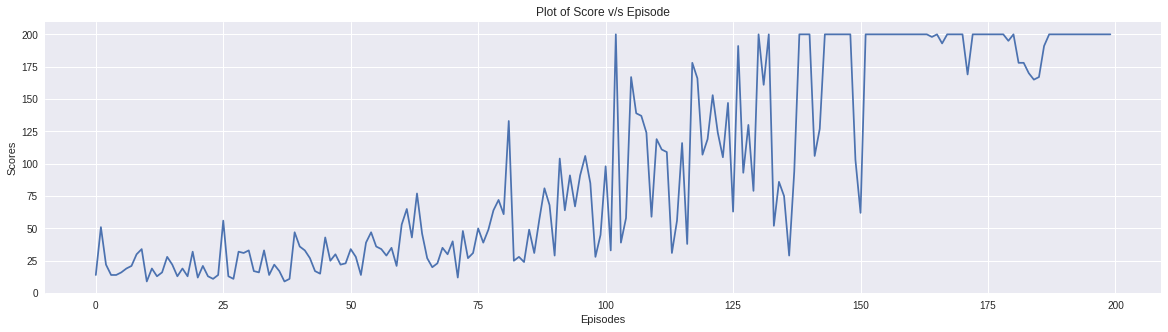

In [35]:
env = gym.make('CartPole-v1')

seed_val = 456
np.random.seed(seed_val)
env.seed(seed_val)
random.seed(seed_val)

states = env.observation_space.shape[0]
actions = env.action_space.n
training_data = deque(maxlen=deque_len)

model = train(target_score=target_score, batch_size=batch_size,
              episodes=episodes, optimizer=optimizer, loss=loss,
              epsilon=epsilon, gamma=gamma, epsilon_min=epsilon_min,
              epsilon_decay=epsilon_decay, actions=actions)